In [1]:
!nvidia-smi

Fri Jul 18 13:12:56 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070        On  | 00000000:AF:00.0 Off |                  N/A |
| 30%   27C    P8              16W / 220W |      1MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import ast
import csv
pd.set_option('display.max_columns', None)

In [3]:
DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
DATASET_PATHS = [f"datasets/{name}_processed.csv" for name in DATASET_NAMES]
# Load and concatenate all datasets
df = pd.concat([pd.read_csv(path, encoding="utf-8-sig") for path in DATASET_PATHS], ignore_index=True)

In [4]:
# ! df.dropna(inplace=True)    # for analysis and vis keep all  
df.head()

type                                             prompt  \
0  empathetic_dialogue             When I was a child I was in a tornado.   
1  empathetic_dialogue       One time i heard someone outside my window.    
2  empathetic_dialogue  I keep hearing things in my kitchen. I think t...   
3  empathetic_dialogue  I am cooking dinner for my boyfriend tomorrow ...   
4  empathetic_dialogue                                          of dying    

  category  \
0   afraid   
1   afraid   
2   afraid   
3   afraid   
4   afraid   

  gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_ids  \
0  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
1  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
2  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
3  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
4  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         

  gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_vals  \
0  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
1  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
2  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
3  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
4  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          

  gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids  \
0  [8920, 12838, 12950, 4194, 3706, 2296, 9570, 1...                              
1  [8920, 12838, 12950, 9869, 2082, 2366, 15045, ...                              
2  [8920, 12838, 12950, 9528, 12207, 8920, 9286, ...                              
3  [8920, 12838, 12950, 9528, 12207, 8920, 2221, ...                              
4  [8920, 12838, 12950, 4725, 14733, 8920, 8920, ...                              

  gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_ids  \
0  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
1  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
2  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
3  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
4  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         

  gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_vals  \
0  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
1  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
2  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
3  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
4  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          

  gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-token_feature_ids  \
0  [9770, 5146, 12054, 11522, 7322, 12054, 6999, ...                              
1  [9770, 5146, 12054, 5343, 11492, 6631, 15045, ...                              
2  [9770, 5146, 12054, 7318, 12054, 592, 4581, 53...                              
3  [9770, 5146, 12054, 7318, 12054, 592, 2653, 44...                              
4  [9770, 5146, 12054, 2915, 1892, 14600, 12054, ...                              

  gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_ids  \
0  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
1  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
2  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
3  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
4  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         

  gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_vals  \
0  [[501.74, 87.69, 72.02, 69.0, 66.

In [5]:
counts = df['type'].value_counts()
# print(counts)

In [6]:
df.describe()

gemma-scope-2b-pt-res-canonical-layer19-top_mean_ids  \
count                                                0.0      
mean                                                 NaN      
std                                                  NaN      
min                                                  NaN      
25%                                                  NaN      
50%                                                  NaN      
75%                                                  NaN      
max                                                  NaN      

       gemma-scope-2b-pt-res-canonical-layer19-top_mean_vals  \
count                                                0.0       
mean                                                 NaN       
std                                                  NaN       
min                                                  NaN       
25%                                                  NaN       
50%                                                  NaN       
75%                                                  NaN       
max                                                  NaN       

       gemma-scope-2b-pt-res-canonical-layer20-top_mean_ids  \
count                                                0.0      
mean                                                 NaN      
std                                                  NaN      
min                                                  NaN      
25%                                                  NaN      
50%                                                  NaN      
75%                                                  NaN      
max                                                  NaN      

       gemma-scope-2b-pt-res-canonical-layer20-top_mean_vals  \
count                                                0.0       
mean                                                 NaN       
std                                                  NaN       
min                                                  NaN       
25%                                                  NaN       
50%                                                  NaN       
75%                                                  NaN       
max                                                  NaN       

       gemma-scope-2b-pt-res-canonical-layer21-top_mean_ids  \
count                                                0.0      
mean                                                 NaN      
std                                                  NaN      
min                                                  NaN      
25%                                                  NaN      
50%                                                  NaN      
75%                                                  NaN      
max                                                  NaN      

       gemma-scope-2b-pt-res-canonical-layer21-top_mean_vals  \
count                                                0.0       
mean                                                 NaN       
std                                                  NaN       
min                                                  NaN       
25%                                                  NaN       
50%                                                  NaN       
75%                                                  NaN       
max                                                  NaN       

       gemma-scope-2b-pt-res-canonical-layer22-top_mean_ids  \
count                                                0.0      
mean                                                 NaN      
std                                                  NaN      
min                                                  NaN      
25%                                                  NaN      
50%                                                  NaN      
75%                                                  NaN      
max                                                  NaN      

    

# Metrics - Similarity | Correlation

The similarity here is different
we pass it to a vector of the same size 
then we use the algorithms to compare it 

if used binary is different outputs 

In [7]:
from scipy.stats import pearsonr
# Linear relationshipo between 2 datasets
def calculate_pearson(vector1, vector2):
    # same size v1 == v2 
    return pearsonr(vector1, vector2)

In [8]:
from scipy.stats import spearmanr
# Monotinic relationship between 2 ranked variables. Association pos/neg 
def calculate_spearman(vector1, vector2):
    """
    Compute Spearman’s rank‐order correlation between two equal-length sequences.
    Returns
    -------
    rho : float
        Spearman correlation coefficient.
    p_value : float
        Two-sided p-value for a hypothesis test whose null hypothesis is that 
        two sets of data are uncorrelated.
    """
    rho, p_value = spearmanr(vector1, vector2)
    return rho, p_value

In [9]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(vector1, vector2):
    """
    Compute the cosine similarity between two equal-length sequences.

    Returns
    -------
    similarity : float
        Cosine of the angle between the two vectors, in [–1, 1].
    """
    v1 = np.array(vector1, dtype=float)
    v2 = np.array(vector2, dtype=float)
    v1_reshaped = v1.reshape(1, -1) # Reshapes [a,b,c] to [[a,b,c]]
    v2_reshaped = v2.reshape(1, -1)
    similarity_matrix = cosine_similarity(v1_reshaped, v2_reshaped)
    return similarity_matrix[0][0]
    
    # dot = np.dot(v1, v2)
    # norm1 = np.linalg.norm(v1)
    # norm2 = np.linalg.norm(v2)
    # print(norm1, norm2)
    # if norm1 == 0 or norm2 == 0:
    #     raise ValueError("One of the vectors is zero‐length, cosine similarity is undefined.")
    # return dot / (norm1 * norm2)

In [10]:
import numpy as np

def calculate_jaccard_similarity(vector1, vector2):
    """
    Compute the (weighted) Jaccard similarity between two non-negative count vectors.

    J = sum_i min(v1_i, v2_i) / sum_i max(v1_i, v2_i)

    Returns
    -------
    similarity : float
        Jaccard similarity in [0, 1].
    """
    v1 = np.array(vector1, dtype=float)
    v2 = np.array(vector2, dtype=float)
    if v1.shape != v2.shape:
        raise ValueError("Vectors must be the same length.")
    intersection = np.minimum(v1, v2).sum()
    union = np.maximum(v1, v2).sum()
    if union == 0:
        return 0.0
    return intersection / union

In [25]:
import numpy as np

def calculate_dice(vec_class1, vec_class2):
    """
    Compute the (weighted) Dice coefficient between two non-negative vectors.

    Dice = 2 * sum_i min(v1_i, v2_i) / (sum_i v1_i + sum_i v2_i)

    Parameters
    ----------
    vec_class1 : array-like of non-negative numbers
    vec_class2 : array-like of non-negative numbers

    Returns
    -------
    dice : float
        Dice coefficient in [0, 1].
    """
    v1 = np.asarray(vec_class1, dtype=float)
    v2 = np.asarray(vec_class2, dtype=float)
    intersection = np.minimum(v1, v2).sum()
    total = v1.sum() + v2.sum()
    return 0.0 if total == 0 else 2 * intersection / total


In [21]:
# create freq of vectors [0, 0, 0, .., 0]
VECTOR_SIZE_SAE = 16384
def to_vector(specialized_df, col_name, binary_vector=False):
    """
    input:
        specialized_df: pandas df 
        col_name: col name with its layer and type 
    output:
        vector of size 16500
            max neuron 16383
    """
    shared_neurons = [0] * VECTOR_SIZE_SAE
    for row_list_str in specialized_df[col_name]:      # TODO: optimize with counter
        # skip missing entries
        if pd.isna(row_list_str):
            continue
        neuron_list = ast.literal_eval(row_list_str)
        for neuron in neuron_list:
            if binary_vector:
                shared_neurons[neuron] = 1
            else:
                shared_neurons[neuron] += 1
            
    return shared_neurons
    
# to_vector(df, "gemma-scope-2b-pt-res-canonical-layer0-token_feature_ids")
# first_list = ast.literal_eval(df["gemma-scope-2b-pt-res-canonical-layer0-token_feature_ids"].iloc[0] )  # now a Python list of ints

In [28]:
class1 = [1,  50, 12, 45]
class2 = [2, 100, 23,  0]

# class1 = [0, 0, 1, 4]
# class2 = [0, 0, 1, 10]

print(calculate_pearson(class1, class2))
print(calculate_spearman(class1, class2))
print(calculate_cosine_similarity(class1, class2))
print(calculate_jaccard_similarity(class1, class2))
print(calculate_dice(class1, class2))

PearsonRResult(statistic=0.5581792661867169, pvalue=0.44182073381328313)
(0.39999999999999997, 0.6)
0.7525492088425632
0.37058823529411766
0.5407725321888412


## Evaluate for all class

In [23]:
# DATASET_TYPES = {
#     "empathetic_dialogue": df.loc[df["type"] == "empathetic_dialogue", "category"].unique(),
#     "math":                df.loc[df["type"] == "math",                "category"].unique(),
#     "mmlu":                df.loc[df["type"] == "mmlu",                "category"].unique(),
#     "programming":         df.loc[df["type"] == "programming",         "category"].unique(),
# }


DATASET_TYPES = [
                "empathetic_dialogue", 
                "math", 
                "mmlu", 
                "programming"
                ]

print(DATASET_TYPES)

['empathetic_dialogue', 'math', 'mmlu', 'programming']


In [ ]:
# DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
import itertools

# for type/ layer  
# c1 
# c2 

TYPE = [
        "res", 
        "mlp", 
        "att",
       ]
LAYER = [i for i in range(26)]
results = []

for typ in TYPE:
    for layer in LAYER:
        # between class
        for class1, class2 in itertools.combinations(DATASET_TYPES, 2):
        # for class1 in DATASET_TYPES:
        #     for class2 in DATASET_TYPES:
        #         if class1 < class2:
        #             continue
            col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
            
            # 1. get df 
            class1_filtered = df[df['type'] == class1]
            class2_filtered = df[df['type'] == class2]
            
            # 2. to vector
            vec_class1 = to_vector(class1_filtered, col, binary_vector=False)
            vec_class2 = to_vector(class2_filtered, col, binary_vector=False)
    
            print(class1, class2)
            
            pearson_corr = calculate_pearson(vec_class1, vec_class2)[0]
            spearman_corr = calculate_spearman(vec_class1, vec_class2)[0]
            cosine_sim = calculate_cosine_similarity(vec_class1, vec_class2)
            jaccard_sim = calculate_jaccard_similarity(vec_class1, vec_class2)
            dice_coeff = calculate_dice(vec_class1, vec_class2)
            # Store results in a dictionary
            result_row = {
                'Type': typ,
                'Layer': layer,
                'Class1': class1,
                'Class2': class2,
                'Pearson_Correlation': pearson_corr,
                'Spearman_Correlation': spearman_corr,
                'Cosine_Similarity': cosine_sim,
                'Jaccard_Similarity': jaccard_sim,
                'Dice_Coefficient': dice_coeff
            }
            results.append(result_row)


empathetic_dialogue empathetic_dialogue
empathetic_dialogue math
empathetic_dialogue mmlu
empathetic_dialogue programming
math empathetic_dialogue
math math
math mmlu
math programming
mmlu empathetic_dialogue
mmlu math
mmlu mmlu
mmlu programming
programming empathetic_dialogue
programming math
programming mmlu
programming programming
empathetic_dialogue empathetic_dialogue
empathetic_dialogue math
empathetic_dialogue mmlu
empathetic_dialogue programming
math empathetic_dialogue
math math
math mmlu
math programming
mmlu empathetic_dialogue
mmlu math
mmlu mmlu
mmlu programming
programming empathetic_dialogue
programming math
programming mmlu
programming programming
empathetic_dialogue empathetic_dialogue
empathetic_dialogue math
empathetic_dialogue mmlu
empathetic_dialogue programming
math empathetic_dialogue
math math
math mmlu
math programming
mmlu empathetic_dialogue
mmlu math
mmlu mmlu
mmlu programming
programming empathetic_dialogue
programming math
programming mmlu
programming prog

In [ ]:
print(results)

In [ ]:
# SAVE RESULTS
vis_df = pd.DataFrame(results)
vis_df.to_csv("./visualization_sae/binary/vis_df_all.csv", index=False)
vis_df.head()

# Visualization part 

In [5]:
import pandas as pd 
# file_name = "./visualization_sae/binary/vis_df_binary.csv"
file_name = "./visualization_sae/vis_df_frequency.csv"
df = pd.read_csv(file_name)
df.head()

Type  Layer               Class1       Class2  Pearson_Correlation  \
0  res      0  empathetic_dialogue         math             0.616738   
1  res      0  empathetic_dialogue         mmlu             0.810170   
2  res      0  empathetic_dialogue  programming             0.415980   
3  res      0                 math         mmlu             0.748609   
4  res      0                 math  programming             0.587524   

   Spearman_Correlation  Cosine_Similarity  Jaccard_Similarity  \
0              0.488857           0.619804            0.124891   
1              0.632395           0.811378            0.270021   
2              0.623712           0.421498            0.040138   
3              0.625291           0.751886            0.277451   
4              0.722531           0.593760            0.125423   

   Dice_Coefficient  
0          0.222049  
1          0.425223  
2          0.077178  
3          0.434382  
4          0.222891

type -> res att mlp 

In [2]:
# import pandas as pd

# DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
# DATASET_PATHS = [f"datasets/{name}_processed.csv" for name in DATASET_NAMES]

# # Load and concatenate all datasets
# df = pd.concat([pd.read_csv(path) for path in DATASET_PATHS], ignore_index=True)
# df.dropna(inplace=True)
# df.head()

type                                             prompt  \
0  empathetic_dialogue             When I was a child I was in a tornado.   
1  empathetic_dialogue       One time i heard someone outside my window.    
2  empathetic_dialogue  I keep hearing things in my kitchen. I think t...   
3  empathetic_dialogue  I am cooking dinner for my boyfriend tomorrow ...   
4  empathetic_dialogue                                          of dying    

  category  \
0   afraid   
1   afraid   
2   afraid   
3   afraid   
4   afraid   

  gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_ids  \
0  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
1  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
2  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
3  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         
4  [[8920, 12838, 12950, 275, 15454, 10006, 1381,...                         

  gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_vals  \
0  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
1  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
2  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
3  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          
4  [[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...                          

  gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids  \
0  [8920, 12838, 12950, 4194, 3706, 2296, 9570, 1...                              
1  [8920, 12838, 12950, 9869, 2082, 2366, 15045, ...                              
2  [8920, 12838, 12950, 9528, 12207, 8920, 9286, ...                              
3  [8920, 12838, 12950, 9528, 12207, 8920, 2221, ...                              
4  [8920, 12838, 12950, 4725, 14733, 8920, 8920, ...                              

  gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_ids  \
0  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
1  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
2  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
3  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         
4  [[9770, 5146, 12054, 740, 13412, 10589, 12539,...                         

  gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_vals  \
0  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
1  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
2  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
3  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          
4  [[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...                          

  gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-token_feature_ids  \
0  [9770, 5146, 12054, 11522, 7322, 12054, 6999, ...                              
1  [9770, 5146, 12054, 5343, 11492, 6631, 15045, ...                              
2  [9770, 5146, 12054, 7318, 12054, 592, 4581, 53...                              
3  [9770, 5146, 12054, 7318, 12054, 592, 2653, 44...                              
4  [9770, 5146, 12054, 2915, 1892, 14600, 12054, ...                              

  gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_ids  \
0  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
1  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
2  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
3  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         
4  [[15089, 14059, 7132, 7361, 4885, 13977, 11527...                         

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  gemma-scope-2b-pt-mlp-canonical-layer_22/width_16k/c

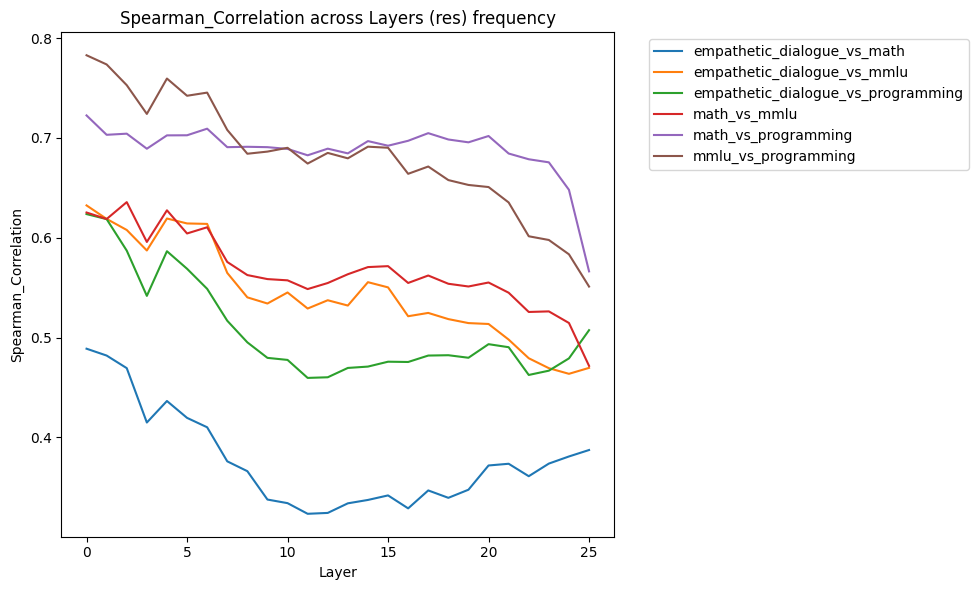

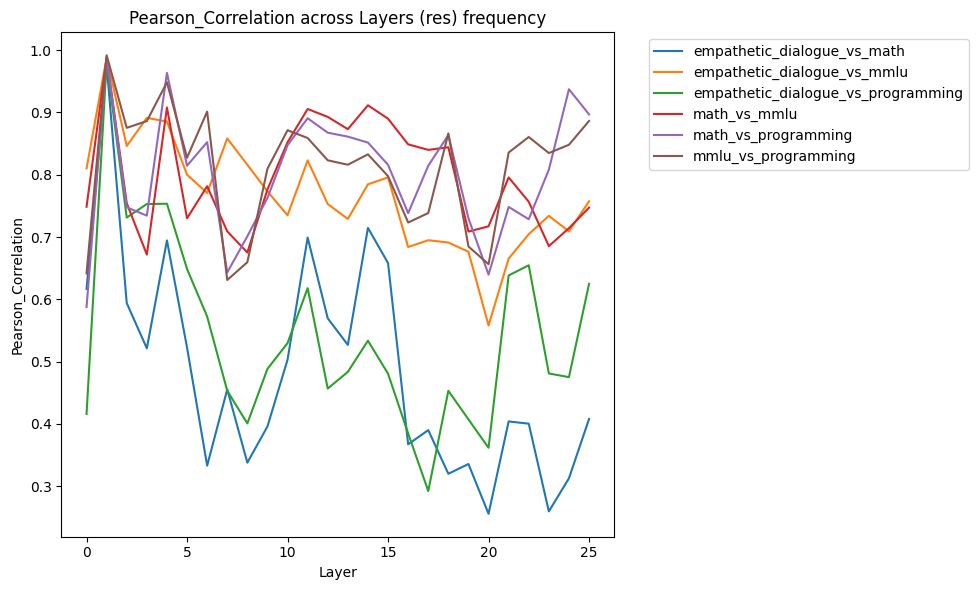

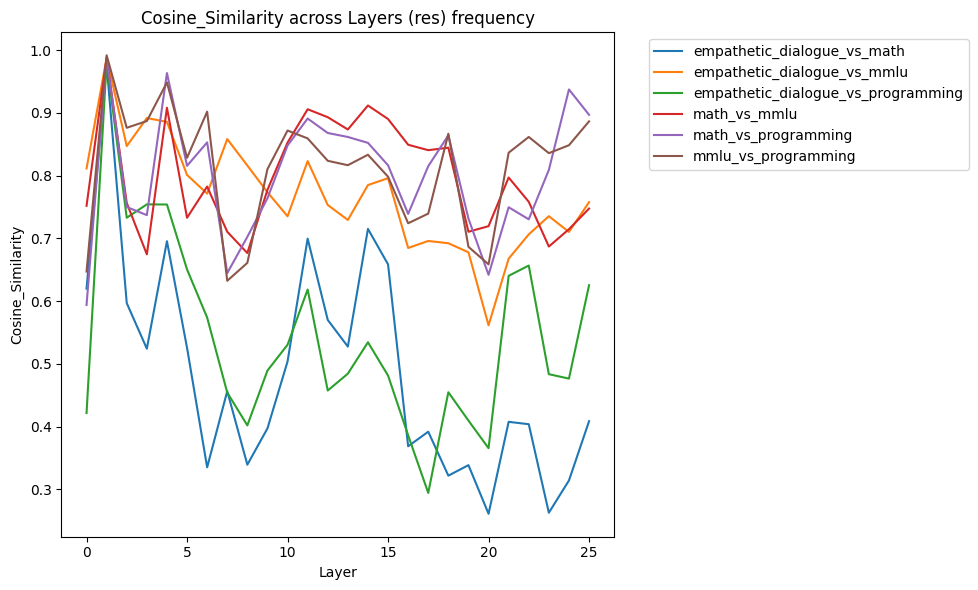

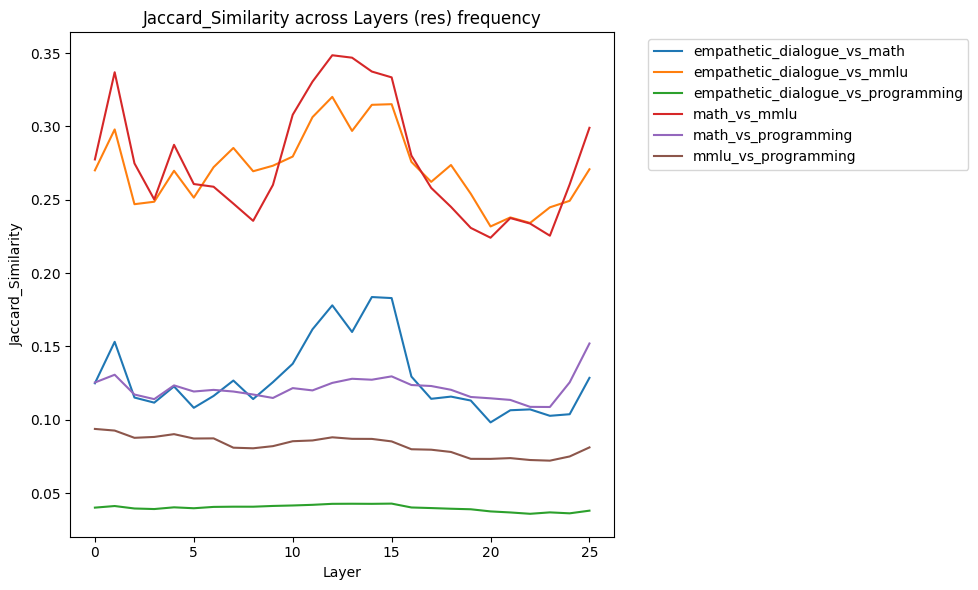

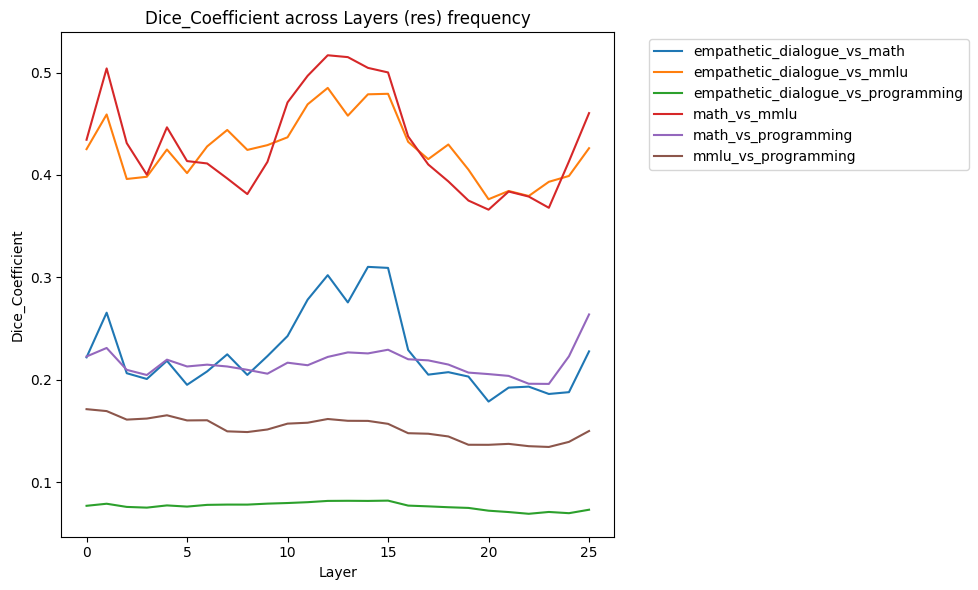

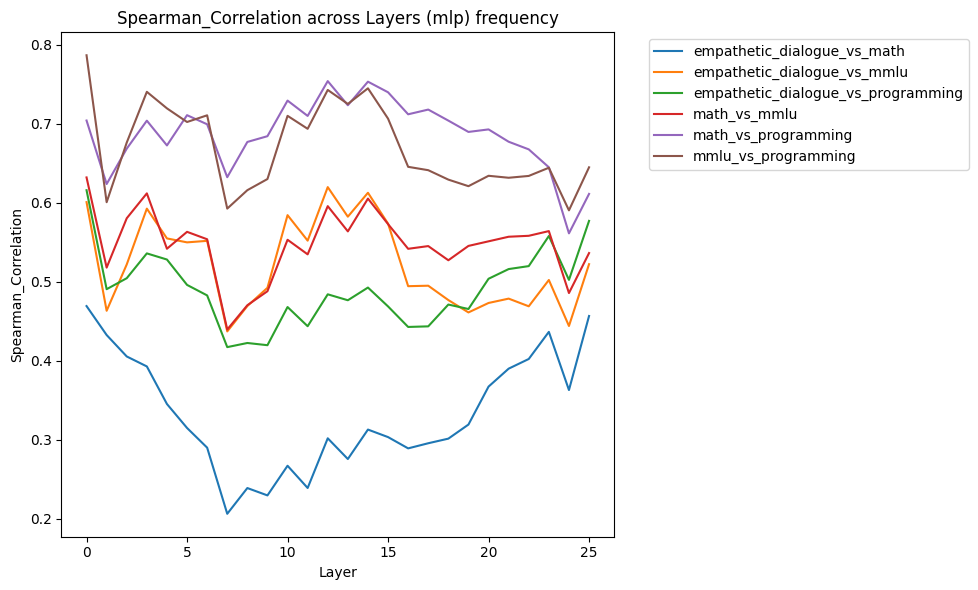

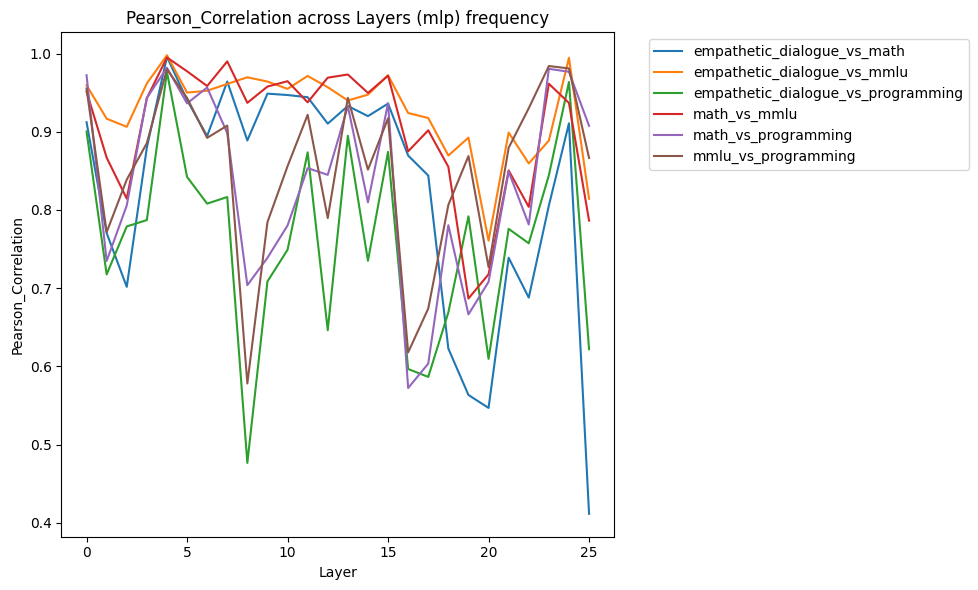

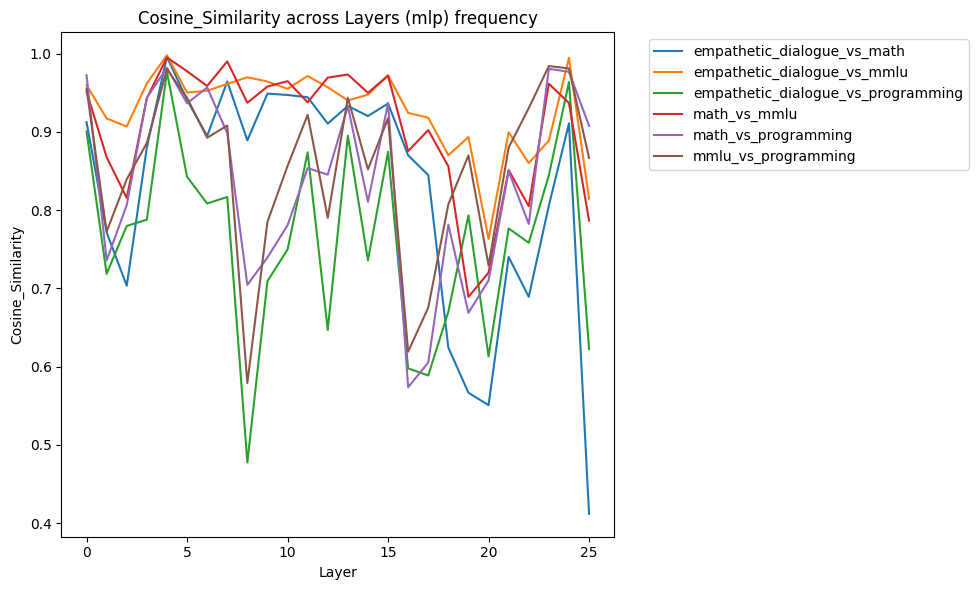

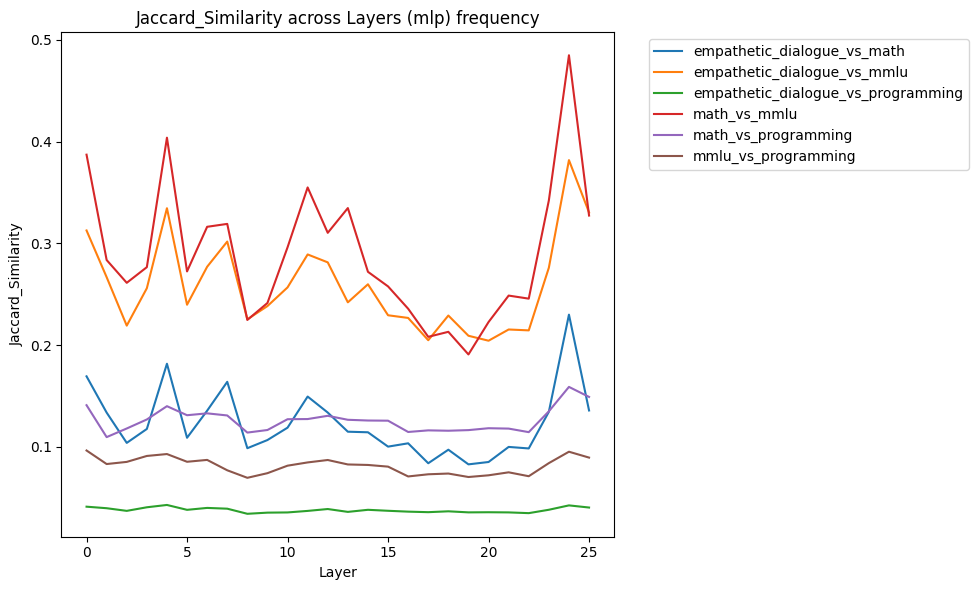

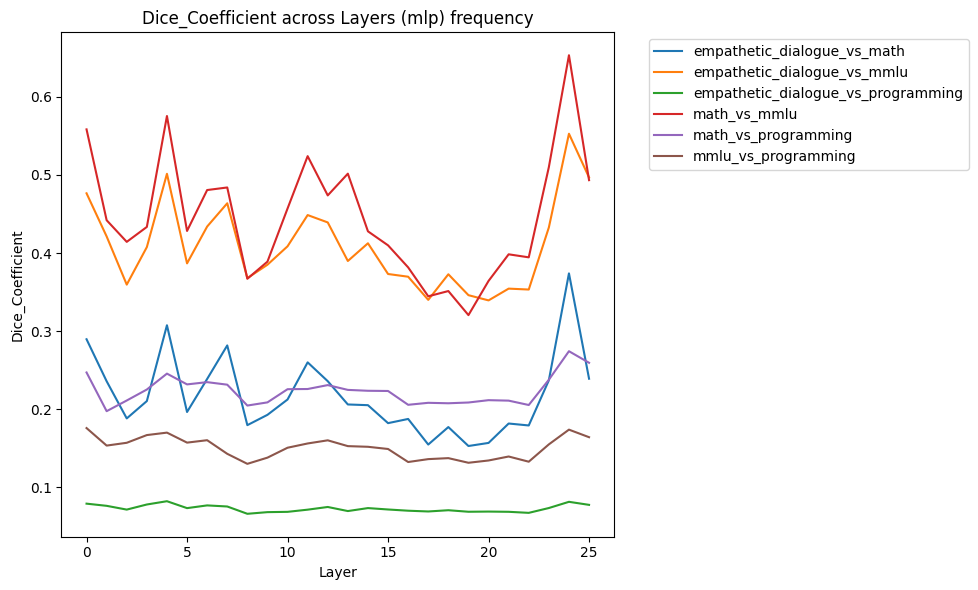

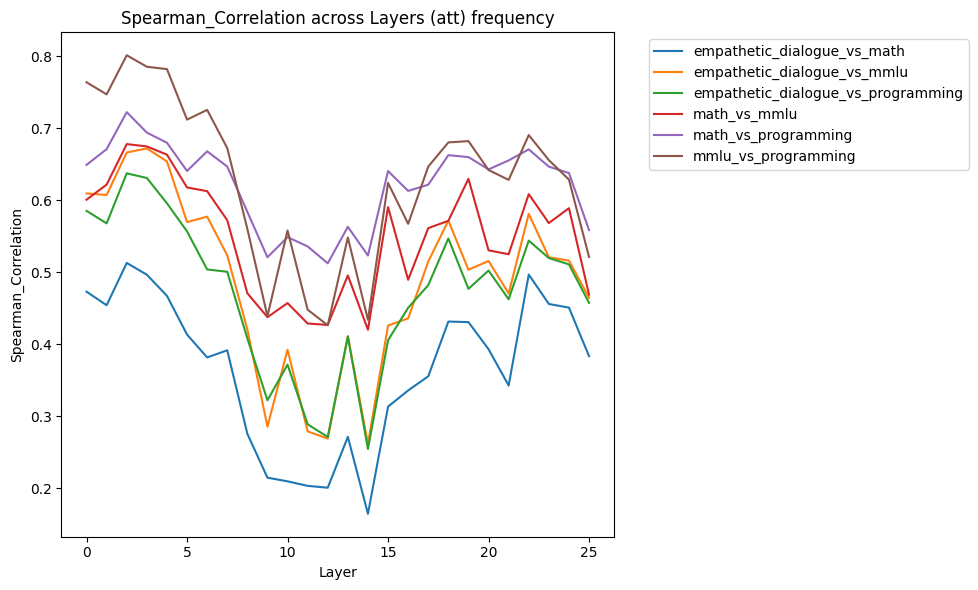

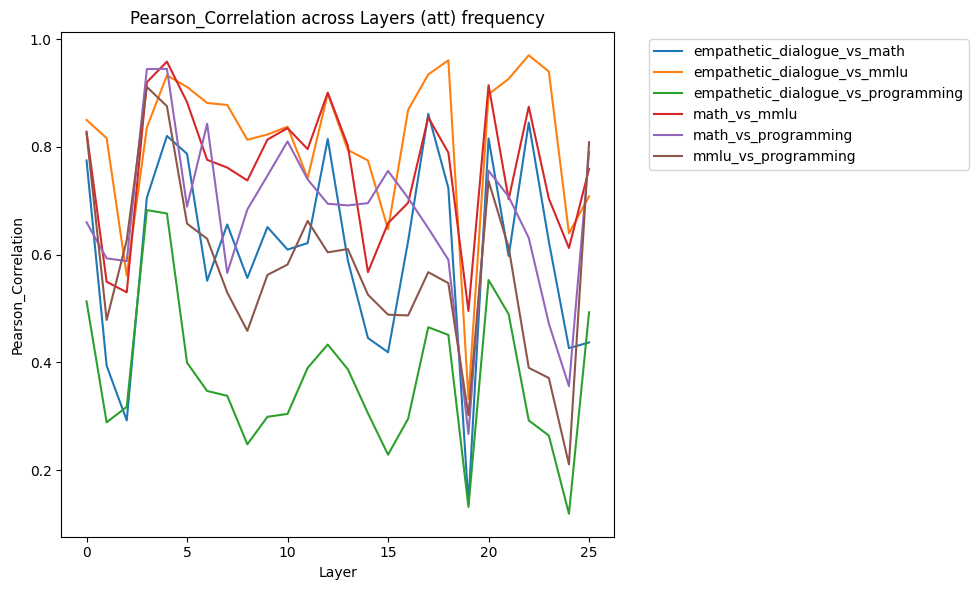

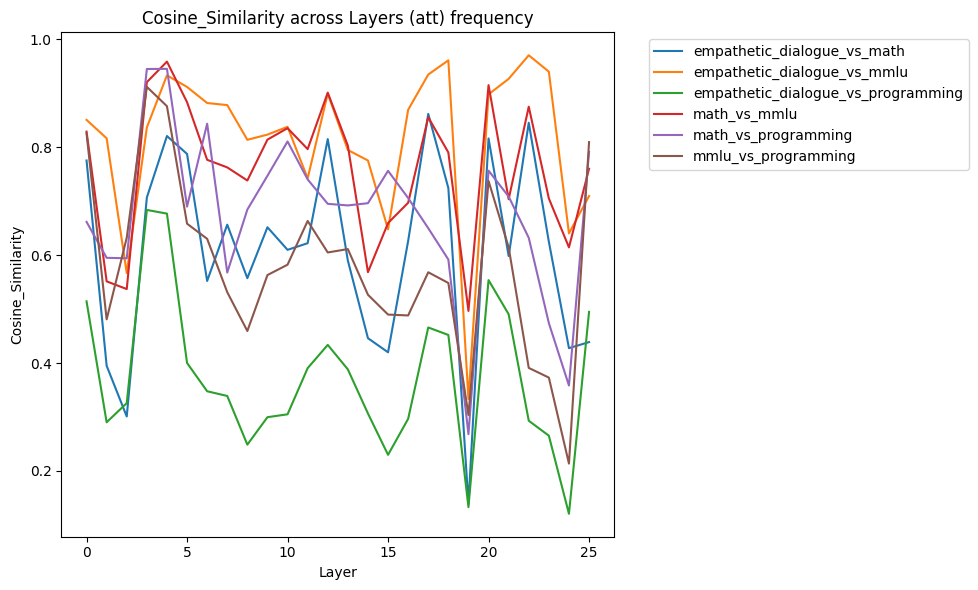

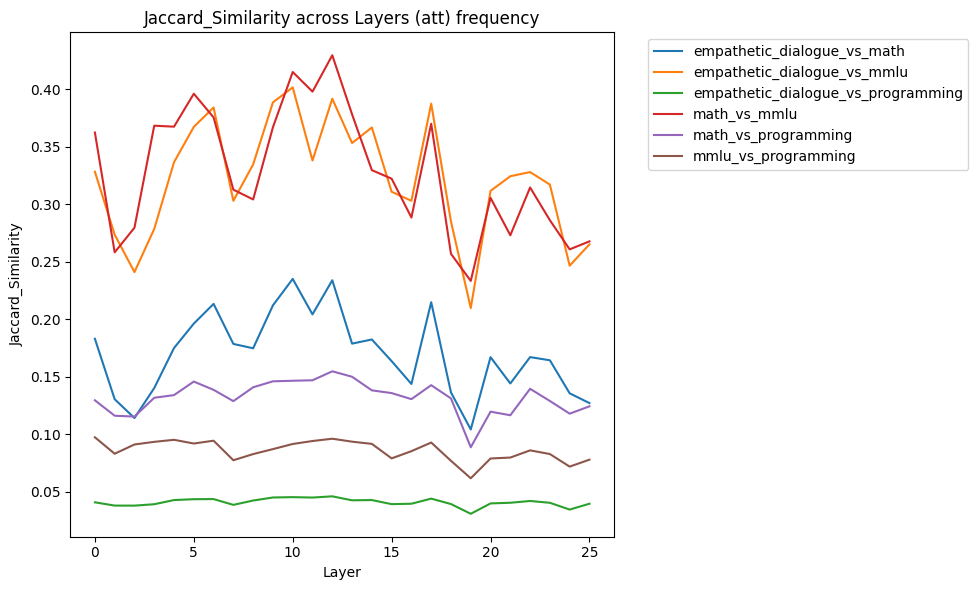

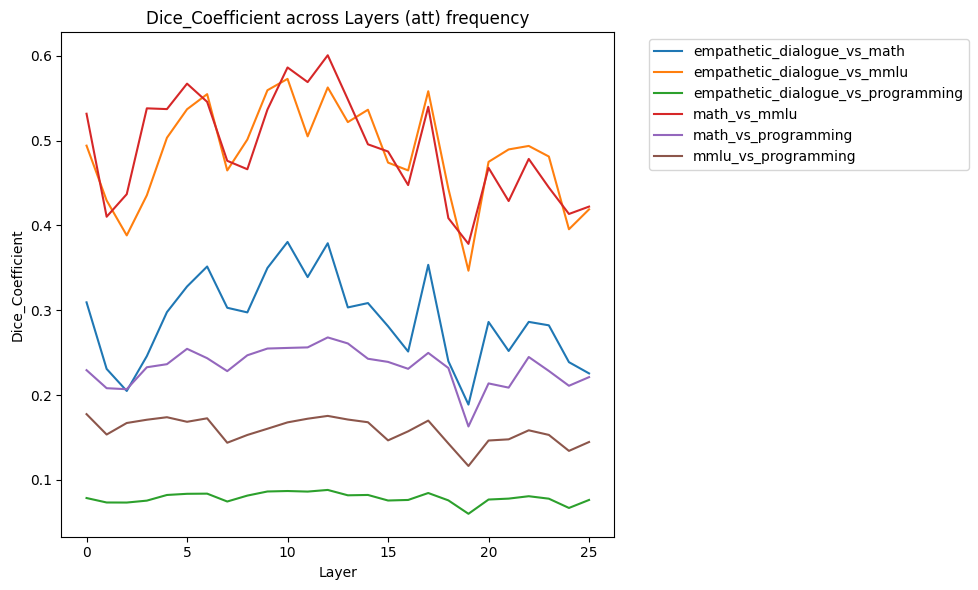

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# output_path = "/content/drive/MyDrive/LLM Interpretability/Figures"
output_path = "./visualization_sae"

def get_graph(typ, algorithm):
    df_temp = df[df['Type'] == typ].copy()

    # Canonical pair label
    df_temp['Pair'] = df_temp[['Class1','Class2']].apply(
        lambda x: '_vs_'.join(sorted(x)), axis=1
    )

    # Pivot
    pivot = df_temp.pivot_table(
        index='Layer',
        columns='Pair',
        values=algorithm,
        aggfunc='mean'
    )

    # Plot: plain solid lines
    plt.figure(figsize=(10,6))
    for pair in pivot.columns:
        plt.plot(pivot.index, pivot[pair], label=pair)
    plt.xlabel('Layer')
    plt.ylabel(algorithm)
    plt.title(f'{algorithm} across Layers ({typ}) frequency')
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{output_path}/{algorithm}_{typ}_frequency.png')
    plt.show()

TYPES = ["res", "mlp", "att"]
ALGORITHMS = ["Spearman_Correlation", "Pearson_Correlation", "Cosine_Similarity", "Jaccard_Similarity", "Dice_Coefficient"]

for typ in TYPES:
  for algorithm in ALGORITHMS:
    get_graph(typ, algorithm)

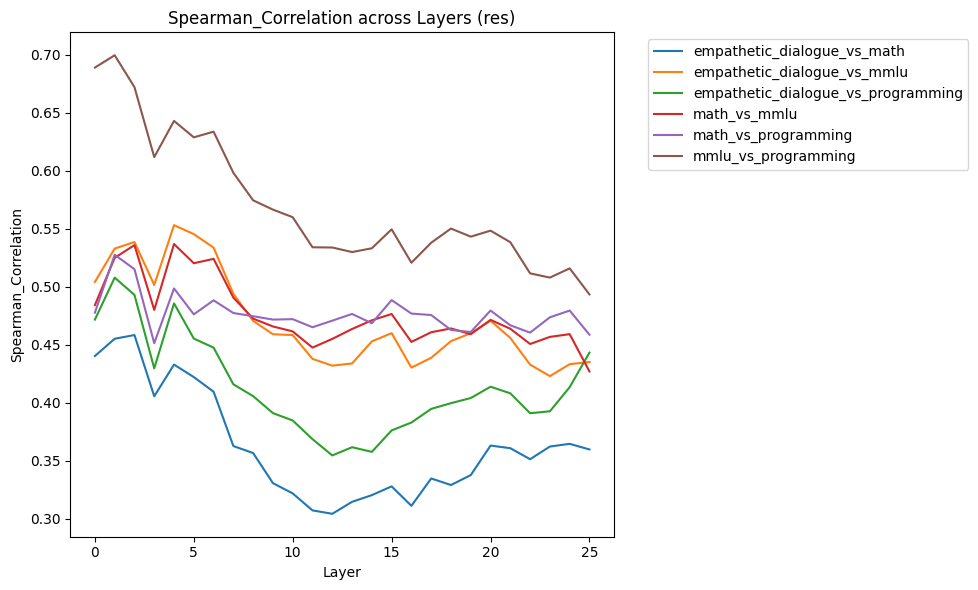

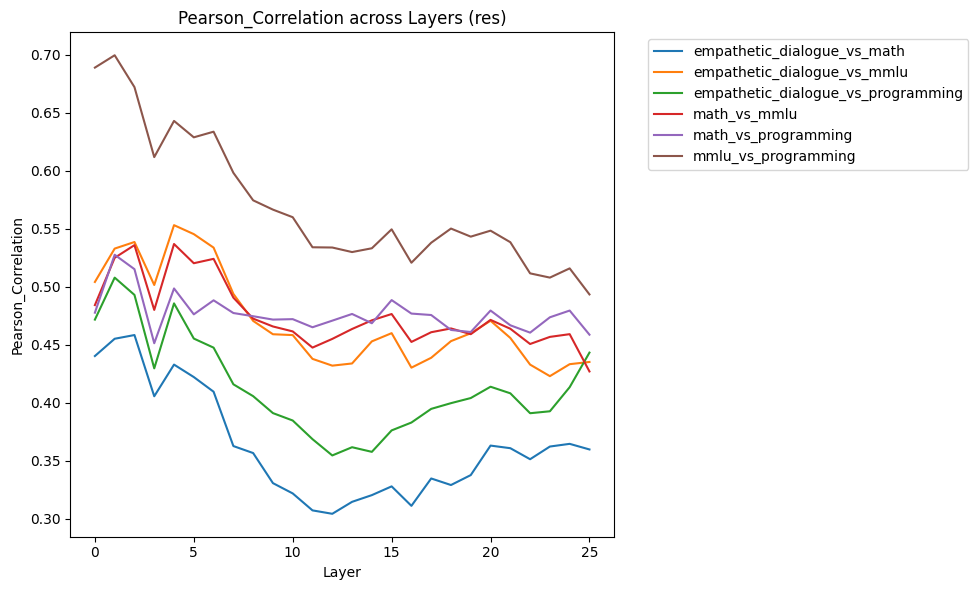

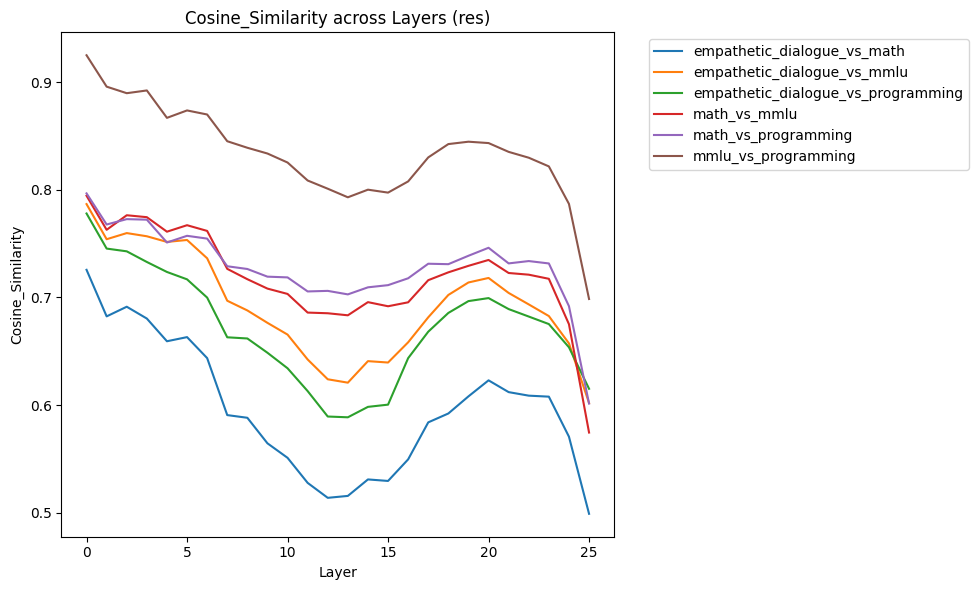

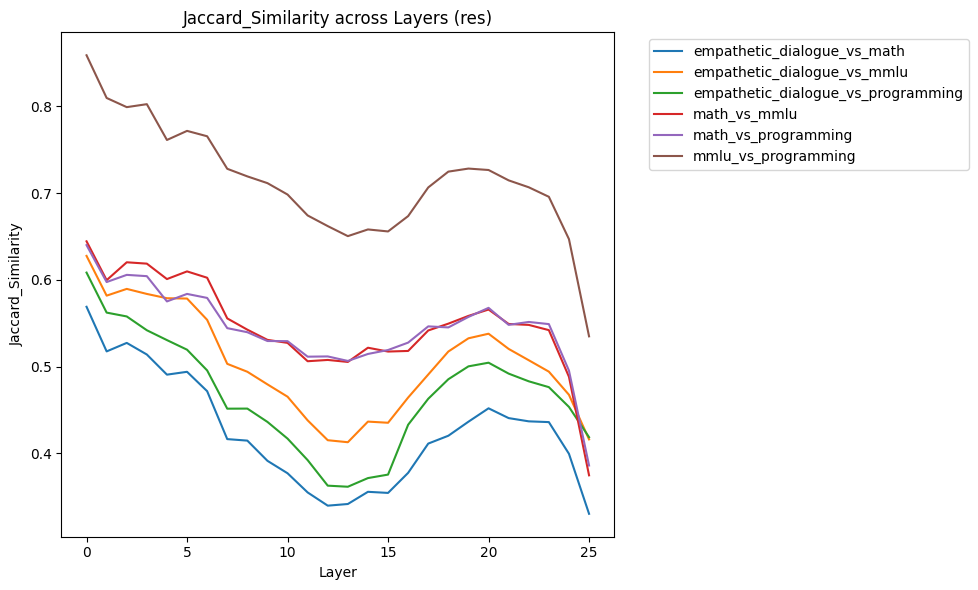

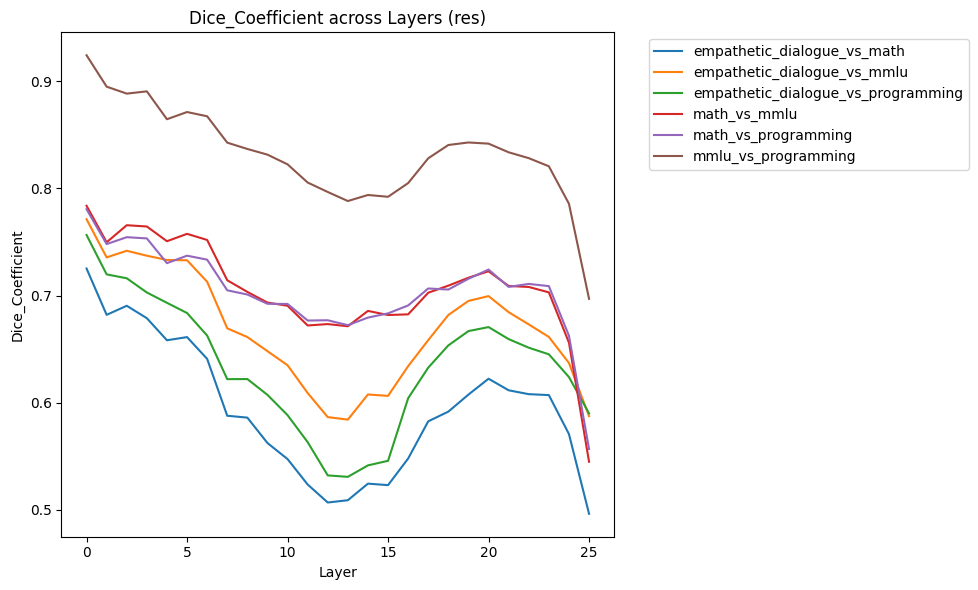

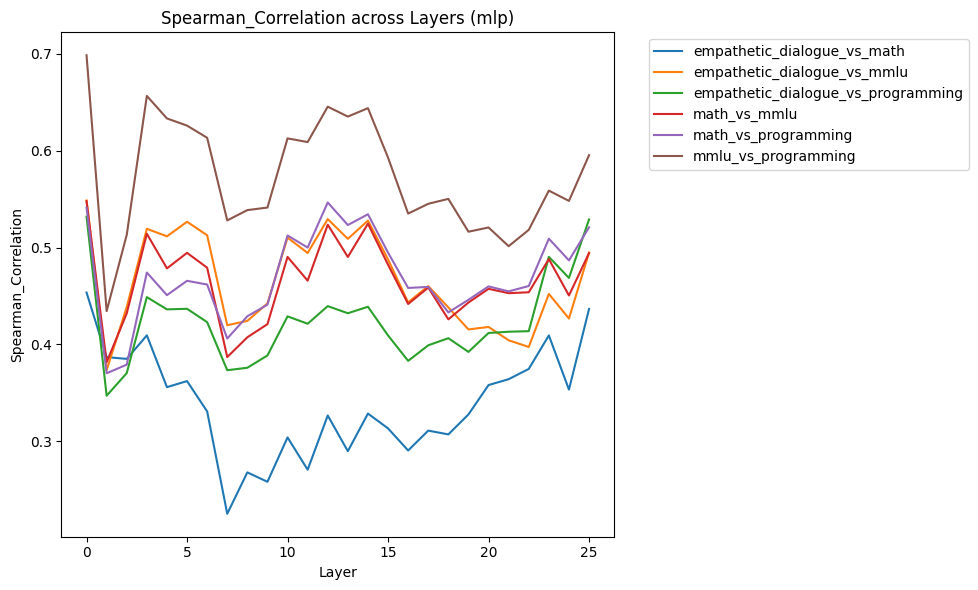

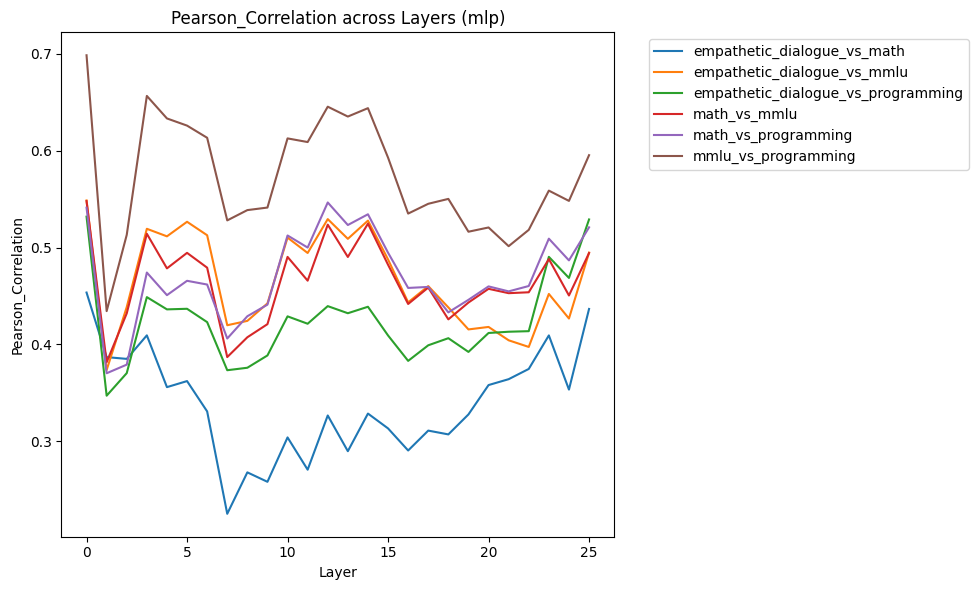

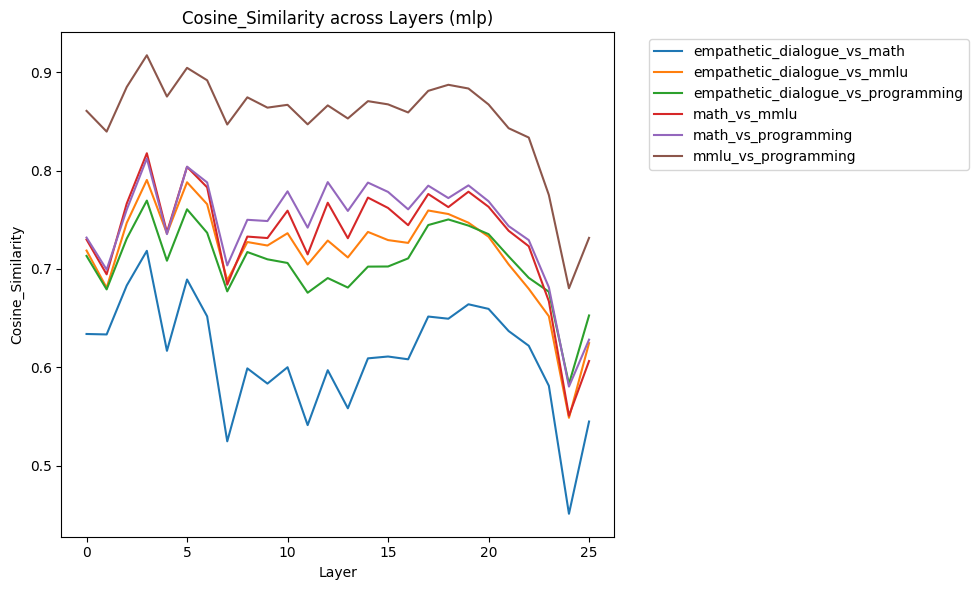

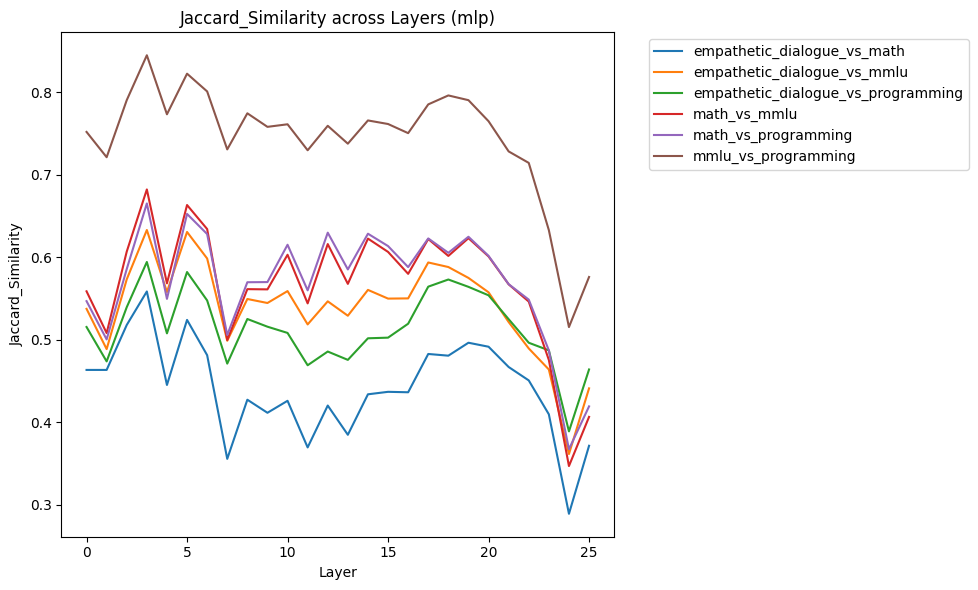

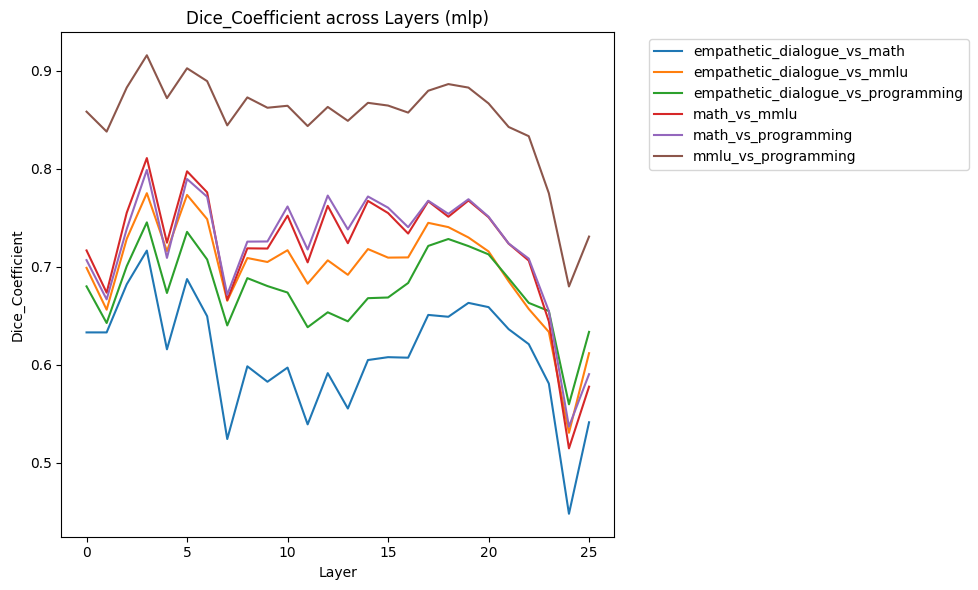

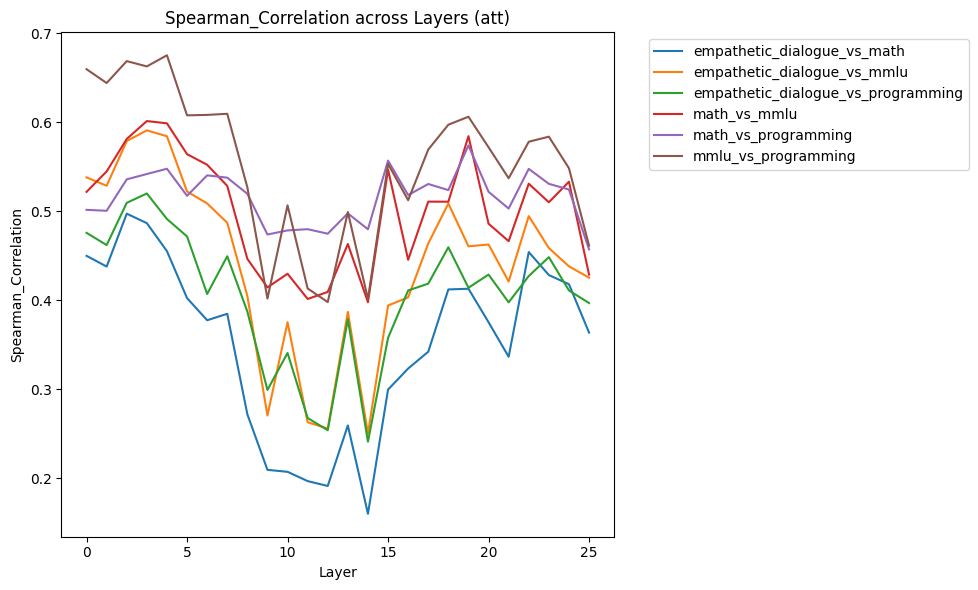

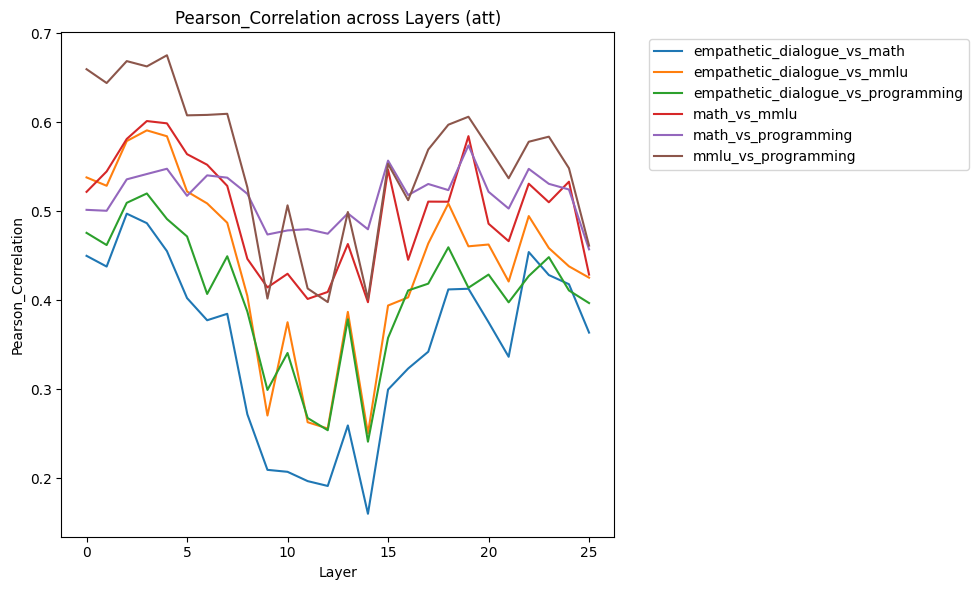

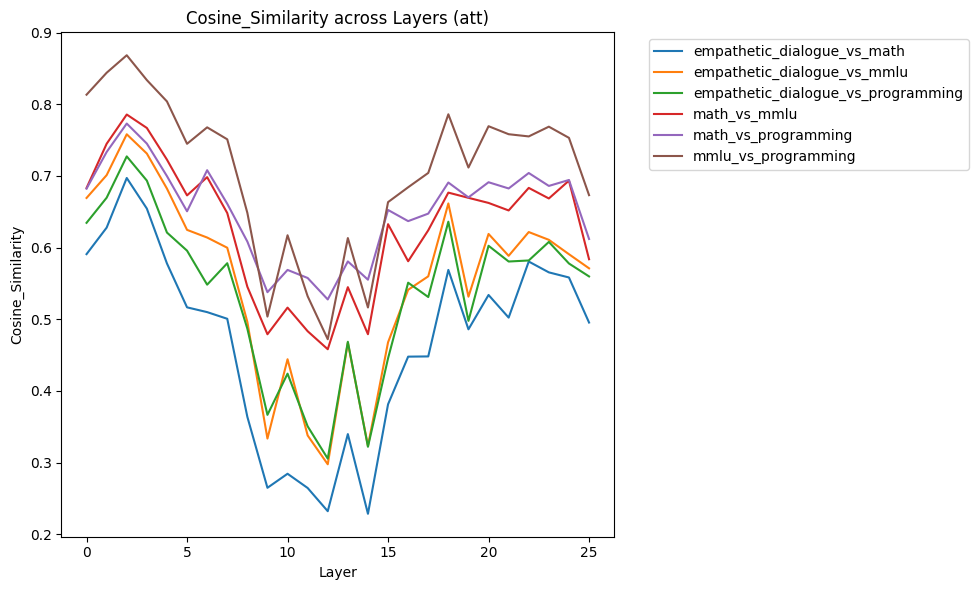

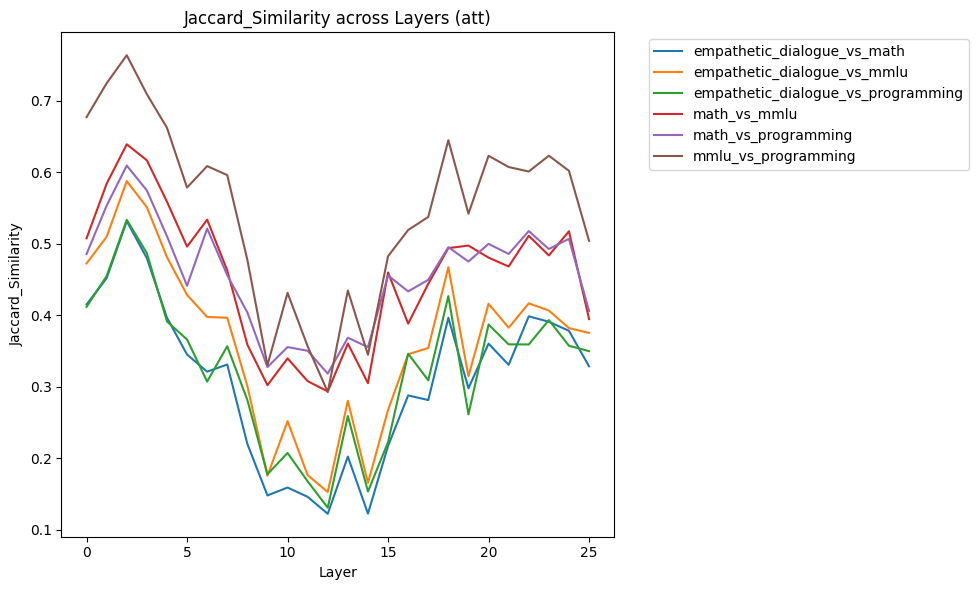

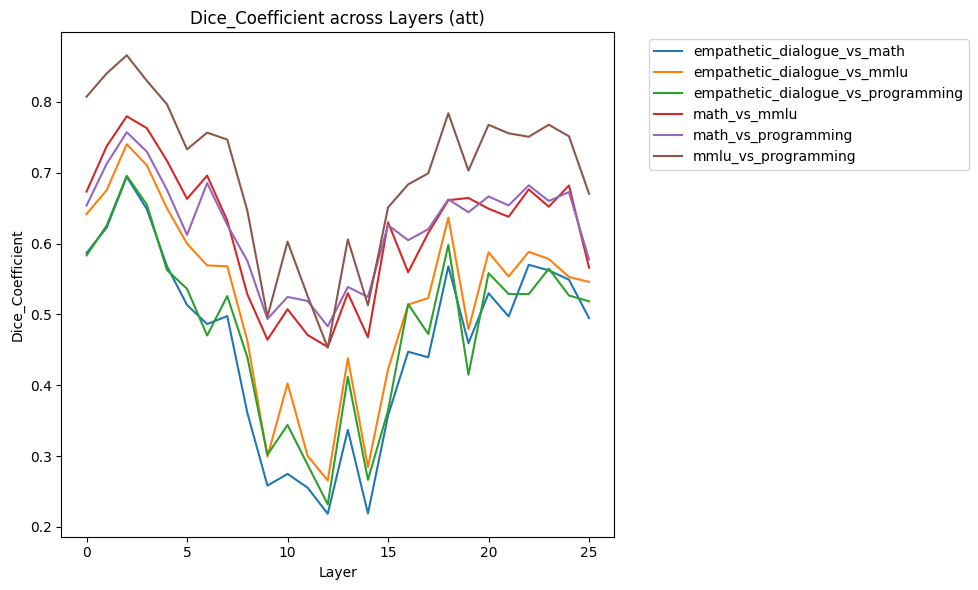

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# output_path = "/content/drive/MyDrive/LLM Interpretability/Figures"
output_path = "./visualization_sae/binary"

def get_graph(typ, algorithm):
    df_temp = df[df['Type'] == typ].copy()

    # Canonical pair label
    df_temp['Pair'] = df_temp[['Class1','Class2']].apply(
        lambda x: '_vs_'.join(sorted(x)), axis=1
    )

    # Pivot
    pivot = df_temp.pivot_table(
        index='Layer',
        columns='Pair',
        values=algorithm,
        aggfunc='mean'
    )

    # Plot: plain solid lines
    plt.figure(figsize=(10,6))
    for pair in pivot.columns:
        plt.plot(pivot.index, pivot[pair], label=pair)
    plt.xlabel('Layer')
    plt.ylabel(algorithm)
    plt.title(f'{algorithm} across Layers ({typ})')
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{output_path}/{algorithm}_{typ}_all_binary.png')
    plt.show()

TYPES = ["res", "mlp", "att"]
ALGORITHMS = ["Spearman_Correlation", "Pearson_Correlation", "Cosine_Similarity", "Jaccard_Similarity", "Dice_Coefficient"]

for typ in TYPES:
  for algorithm in ALGORITHMS:
    get_graph(typ, algorithm)

# ==================================================================================

# OLD VIS

In [8]:
asdfasdfasdf

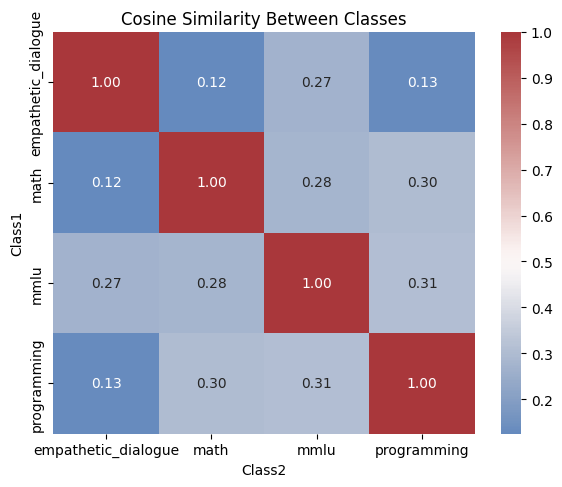

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# assume vis_df is your DataFrame
# pivot so rows=Class1, cols=Class2, values=Cosine_Similarity
cosine_mat = vis_df.pivot(
    index="Class1",
    columns="Class2",
    values="Jaccard_Similarity"
)

plt.figure(figsize=(6,5))
sns.heatmap(
    cosine_mat,
    annot=True,      # show the numbers
    fmt=".2f",       # two decimal places
    cmap="vlag",     # blue–white–red diverging
    center=0.5       # center the colormap around a neutral value if you like
)
plt.title("Cosine Similarity Between Classes")
plt.tight_layout()
plt.show()


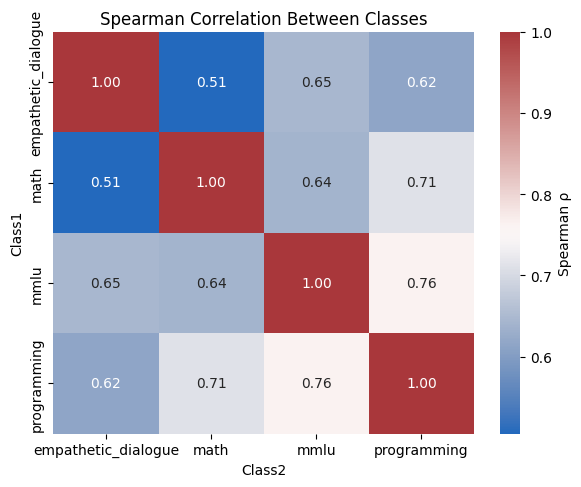

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Unpack the tuple columns into raw floats
vis_df['Pearson_r']    = vis_df['Pearson_Correlation'] .apply(lambda t: t[0])
vis_df['Spearman_rho'] = vis_df['Spearman_Correlation'].apply(lambda t: t[0])
# (Cosine_Similarity and Jaccard_Similarity are already floats)

# 2) Pivot on the numeric column you want to visualize
spearman_mat = vis_df.pivot(
    index='Class1',
    columns='Class2',
    values='Spearman_rho'
)

# 3) Plot the heatmap
plt.figure(figsize=(6,5))
sns.heatmap(
    spearman_mat,
    annot=True,    # show each cell’s value
    fmt=".2f",     # two decimals
    cmap="vlag",   # diverging blue–white–red
    cbar_kws={'label': 'Spearman ρ'}
)
plt.title("Spearman Correlation Between Classes")
plt.xlabel("Class2")
plt.ylabel("Class1")
plt.tight_layout()
plt.show()


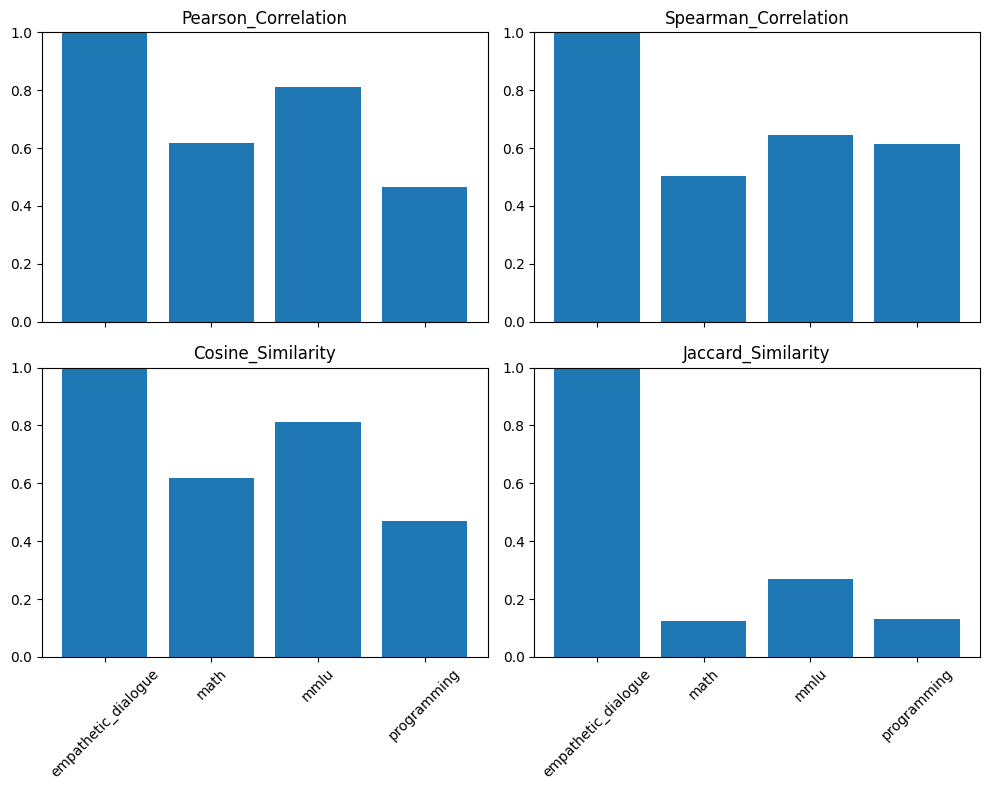

In [113]:
import matplotlib.pyplot as plt

# filter to only rows where Class1 == "empathetic_dialogue"
sub = vis_df[vis_df.Class1 == "empathetic_dialogue"]

metrics = [
    "Pearson_Correlation", 
    "Spearman_Correlation", 
    "Cosine_Similarity", 
    "Jaccard_Similarity"
]

fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True)
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    # some of your metrics are tuples (corr, p‐value); extract the first element
    vals = sub[metric].apply(lambda x: x[0] if isinstance(x, tuple) else x)
    ax.bar(sub.Class2, vals)
    ax.set_title(metric)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


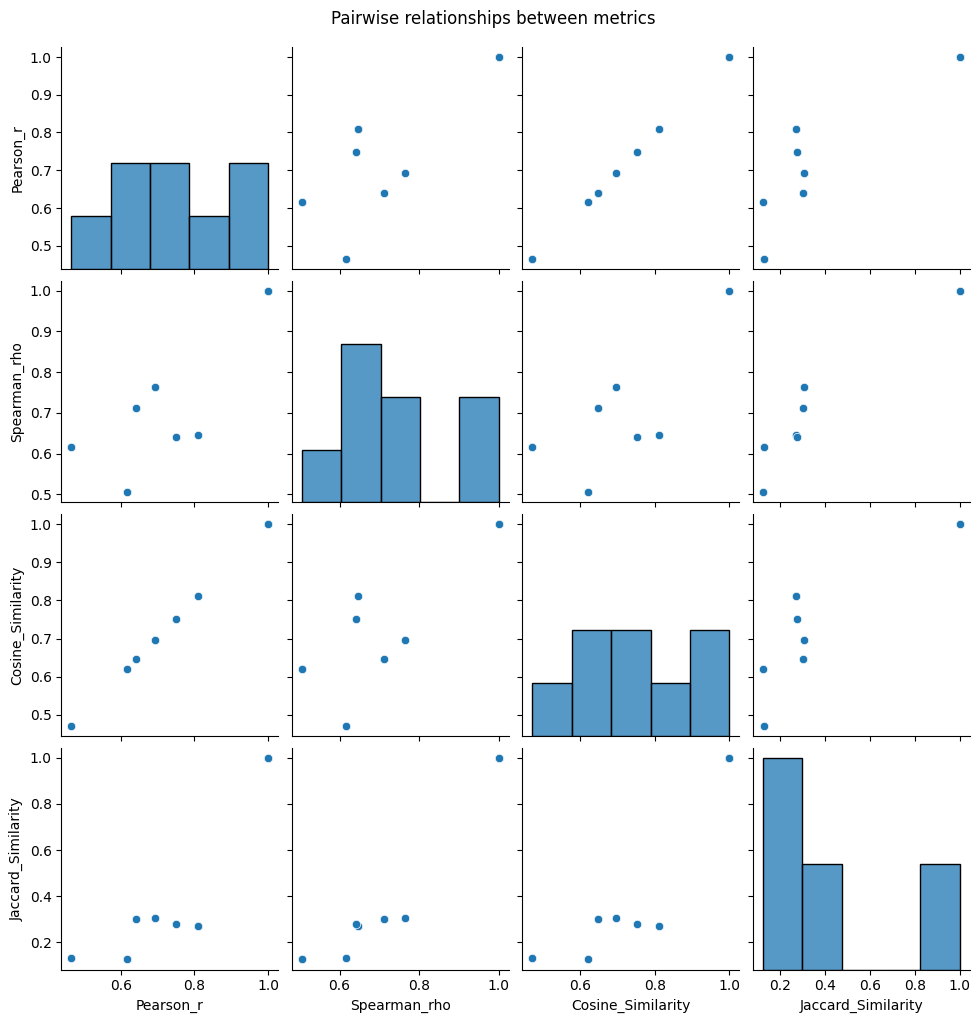

In [114]:
import seaborn as sns

# first unpack the tuple columns into raw floats
vis_df["Pearson_r"]  = vis_df.Pearson_Correlation .apply(lambda x: x[0])
vis_df["Spearman_rho"] = vis_df.Spearman_Correlation.apply(lambda x: x[0])

# now pick the four numeric columns
plot_df = vis_df[[
    "Pearson_r",
    "Spearman_rho",
    "Cosine_Similarity",
    "Jaccard_Similarity"
]]

sns.pairplot(plot_df)
plt.suptitle("Pairwise relationships between metrics", y=1.02)
plt.show()


# Shared skills

In [15]:
import numpy as np

def find_co_occurring_neurons(vec1, vec2):
    """
    Finds neurons that have a non-zero activation count in both vectors.

    Parameters:
    vec1 (list or np.array): The first frequency vector.
    vec2 (list or np.array): The second frequency vector.

    Returns:
    list: A list of neuron IDs that are co-occurring.
    """
    co_occurring = []
    # Ensure both are numpy arrays for element-wise comparison
    v1_np = np.array(vec1)
    v2_np = np.array(vec2)

    # Iterate through the indices (neuron IDs)
    for neuron_id in range(min(len(v1_np), len(v2_np))):
        if v1_np[neuron_id] > 0 and v2_np[neuron_id] > 0:
            co_occurring.append(neuron_id)
    return co_occurring

# Example Usage:
class1_vec = [1, 5, 0, 10, 0, 2]
class2_vec = [2, 3, 0, 8, 1, 2]

shared_neurons = find_co_occurring_neurons(class1_vec, class2_vec)
print(f"Neurons co-occurring in both vectors: {shared_neurons}")
# Output: Neurons co-occurring in both vectors: [0, 1, 3, 5]

Neurons co-occurring in both vectors: [0, 1, 3, 5]


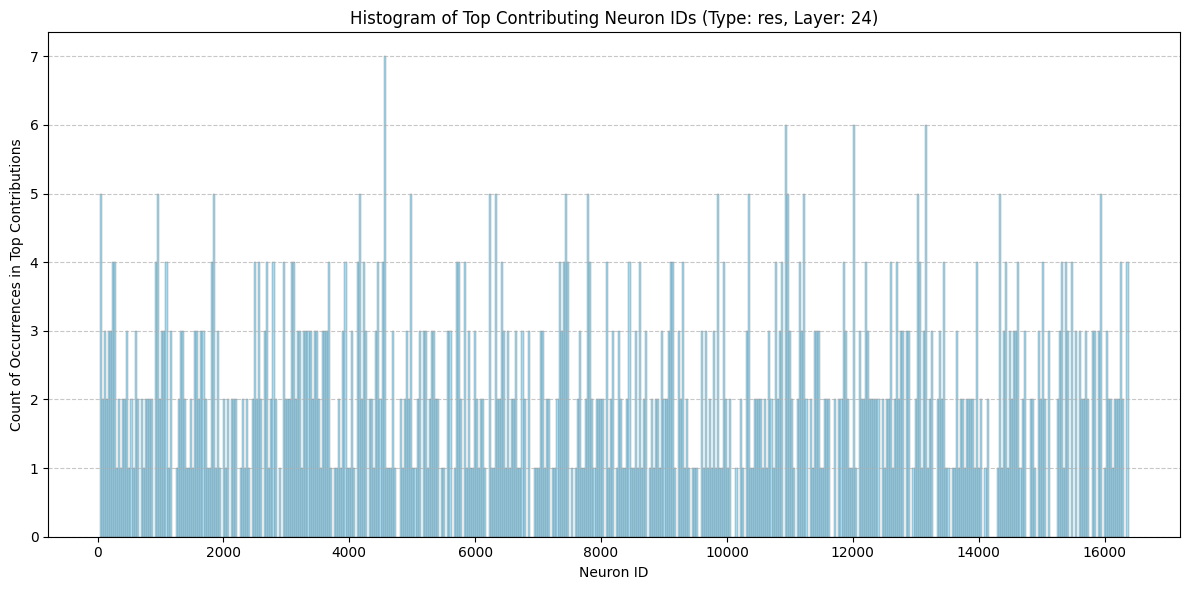

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns 
# --- Generating the Histogram ---

plt.figure(figsize=(12, 6))

# Histogram of Neuron IDs
sns.histplot(
    data=contributing_neurons_df,
    x='Neuron_ID',
    bins=500, # Number of bins to group the neuron IDs. Adjust as needed.
    kde=False, # Do not draw a kernel density estimate
    color='skyblue',
    edgecolor='black'
)

plt.title(f'Histogram of Top Contributing Neuron IDs (Type: {typ}, Layer: {layer})')
plt.xlabel('Neuron ID')
plt.ylabel('Count of Occurrences in Top Contributions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

filename = f"./figures/1000histogram_neurons_type_{typ}_layer_{layer}.png"
plt.savefig(filename, dpi=300)  # dpi=300 for high resolution

plt.show()


# Load back for interp

In [48]:
import os
import re

# file_name = "contributing_neurons_type-res_layer-24_C1-math_C2-programming.csv"
file_name = "contributing_neurons_type-res_layer-24_C1-empathetic_dialogue_C2-mmlu.csv"
# Example parsing using regular expressions
match = re.match(r"contributing_neurons_type-(.*)_layer-(\d+)_C1-(.*)_C2-(.*)\.csv", file_name)
if match:
    typ_loaded = match.group(1)
    layer_loaded = int(match.group(2))
    class1_loaded = match.group(3)
    class2_loaded = match.group(4)
    print(f"Loaded Metadata: Type={typ_loaded}, Layer={layer_loaded}, C1={class1_loaded}, C2={class2_loaded}")

Loaded Metadata: Type=res, Layer=24, C1=empathetic_dialogue, C2=mmlu
